In [1]:
import diffusion
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

/Users/datvodinh/miniconda3/envs/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/datvodinh/miniconda3/envs/venv/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
model = diffusion.ForwardDiffusion(max_timesteps=1000)

In [3]:
img = Image.open("cat.jpeg")

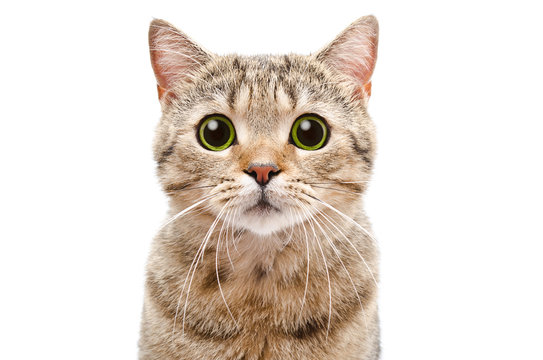

In [4]:
img

In [5]:
img_tensor = torch.from_numpy(np.array(img)).permute(2,0,1)

In [6]:
img_tensor = (img_tensor - 255. / 2) / (255./2)

In [7]:
img_tensor.max(), img_tensor.min()

(tensor(1.), tensor(-1.))

In [8]:
img_tensor.shape

torch.Size([3, 360, 543])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


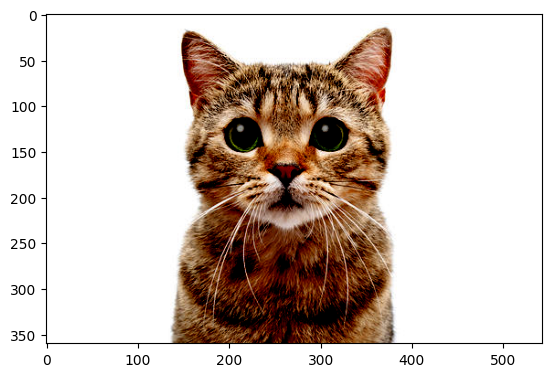

In [9]:
plt.imshow(img_tensor.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1.) tensor(-1.)
tensor(1.) tensor(-1.)
tensor(1.) tensor(-1.)
tensor(1.) tensor(-1.)
tensor(1.) tensor(-1.)
tensor(1.) tensor(-1.)
tensor(1.) tensor(-1.)
tensor(1.) tensor(-1.)
tensor(1.) tensor(-1.)
tensor(1.) tensor(-1.)


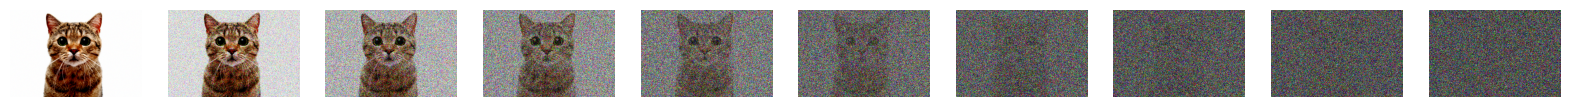

In [11]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    out = model(img_tensor, torch.tensor([i*100]))[0].permute(1,2,0)
    print(out.max(),out.min())
    plt.imshow(out)
    plt.axis('off')

In [38]:
import torch
import torch.nn as nn
import math

class SinusoidalPosEmb(nn.Module):
    def __init__(self, dim, theta = 10000):
        super().__init__()
        self.dim = dim
        self.theta = theta

    def forward(self, x):
        device = x.device
        half_dim = self.dim // 2
        emb = math.log(self.theta) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, device=device) * -emb)
        emb = x[:, None] * emb[None, :]
        emb = torch.cat((emb.sin(), emb.cos()), dim=-1)
        return emb

In [39]:
sinu = SinusoidalPosEmb(dim=4)

In [40]:
sinu(torch.tensor([1,2,3,4,5,1]))

tensor([[ 8.4147e-01,  1.0000e-04,  5.4030e-01,  1.0000e+00],
        [ 9.0930e-01,  2.0000e-04, -4.1615e-01,  1.0000e+00],
        [ 1.4112e-01,  3.0000e-04, -9.8999e-01,  1.0000e+00],
        [-7.5680e-01,  4.0000e-04, -6.5364e-01,  1.0000e+00],
        [-9.5892e-01,  5.0000e-04,  2.8366e-01,  1.0000e+00],
        [ 8.4147e-01,  1.0000e-04,  5.4030e-01,  1.0000e+00]])

In [15]:
a = torch.randn(3,4,5)

In [16]:
a.shape

torch.Size([3, 4, 5])

In [18]:
torch.einsum('abc->bca',a).shape

torch.Size([4, 5, 3])

In [21]:
f = lambda t: torch.einsum("(a d) bc->bcad",t)

In [22]:
f(a)

RuntimeError: einsum(): invalid subscript given at index 0 in the equation string, subscripts must be in [a-zA-Z]

In [10]:
import torch
a = torch.linspace(start=1,end=16,steps=10)

In [17]:
a = torch.arange(0,64,1).reshape(2,2,4,4)

In [19]:
a

tensor([[[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [12, 13, 14, 15]],

         [[16, 17, 18, 19],
          [20, 21, 22, 23],
          [24, 25, 26, 27],
          [28, 29, 30, 31]]],


        [[[32, 33, 34, 35],
          [36, 37, 38, 39],
          [40, 41, 42, 43],
          [44, 45, 46, 47]],

         [[48, 49, 50, 51],
          [52, 53, 54, 55],
          [56, 57, 58, 59],
          [60, 61, 62, 63]]]])

In [21]:
b = torch.tensor([2,4])

In [24]:
b.reshape(2,1,1,1)*a

tensor([[[[  0,   2,   4,   6],
          [  8,  10,  12,  14],
          [ 16,  18,  20,  22],
          [ 24,  26,  28,  30]],

         [[ 32,  34,  36,  38],
          [ 40,  42,  44,  46],
          [ 48,  50,  52,  54],
          [ 56,  58,  60,  62]]],


        [[[128, 132, 136, 140],
          [144, 148, 152, 156],
          [160, 164, 168, 172],
          [176, 180, 184, 188]],

         [[192, 196, 200, 204],
          [208, 212, 216, 220],
          [224, 228, 232, 236],
          [240, 244, 248, 252]]]])